In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Cross-Validation and Nonparametric Logistic Regression

### Cross-Validation Formula

The cross-validation error can be computed as:

$$CV(\hat{f}_\lambda) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{f}_\lambda^{(-i)}(x_i))^2 \tag{5.26}$$

This can be remarkably simplified to:

$$CV(\hat{f}_\lambda) = \frac{1}{N} \sum_{i=1}^{N} \left(\frac{y_i - \hat{f}_\lambda(x_i)}{1 - S_\lambda(i,i)}\right)^2 \tag{5.27}$$

which can be computed for each value of $\lambda$ from the original fitted values and the diagonal elements $S_\lambda(i,i)$ of $S_\lambda$ (Exercise 5.13). 

The EPE and CV curves have a similar shape, but the entire CV curve is above the EPE curve. For some realizations this is reversed, and overall the CV curve is approximately unbiased as an estimate of the EPE curve.

##  Nonparametric Logistic Regression

The smoothing spline problem in Section 5.4 is posed in a regression setting. It is typically straightforward to transfer this technology to other domains. Here we consider logistic regression with a single quantitative input $X$.

### Model Specification

The model is:

$$\log \frac{\Pr(Y = 1|X = x)}{\Pr(Y = 0|X = x)} = f(x) \tag{5.28}$$

which implies:

$$\Pr(Y = 1|X = x) = \frac{e^{f(x)}}{1 + e^{f(x)}} \tag{5.29}$$

Fitting $f(x)$ in a smooth fashion leads to a smooth estimate of the conditional probability $\Pr(Y = 1|x)$, which can be used for classification or risk scoring.

### Penalized Log-Likelihood Criterion

We construct the penalized log-likelihood criterion:

$$\ell(f; \lambda) = \sum_{i=1}^{N} [y_i \log p(x_i) + (1 - y_i) \log(1 - p(x_i))] - \frac{\lambda}{2} \int \{f''(t)\}^2 dt$$

$$= \sum_{i=1}^{N} \left[y_i f(x_i) - \log(1 + e^{f(x_i)})\right] - \frac{\lambda}{2} \int \{f''(t)\}^2 dt \tag{5.30}$$

where we have abbreviated $p(x) = \Pr(Y = 1|x)$. The first term in this expression is the log-likelihood based on the binomial distribution (c.f. Chapter 4, page 120).

### Optimization

Arguments similar to those used in Section 5.4 show that the optimal $f$ is a finite-dimensional natural spline with knots at the unique values of $x$. This means that we can represent:

$$f(x) = \sum_{j=1}^{N} N_j(x)\theta_j$$

We compute the first and second derivatives:

$$\frac{\partial \ell(\theta)}{\partial \theta} = N^T(y - p) - \lambda\Omega\theta \tag{5.31}$$

$$\frac{\partial^2 \ell(\theta)}{\partial \theta \partial \theta^T} = -N^T WN - \lambda\Omega \tag{5.32}$$

where $p$ is the $N$-vector with elements $p(x_i)$, and $W$ is a diagonal matrix of weights $p(x_i)(1 - p(x_i))$.

### Newton-Raphson Update

The first derivative (5.31) is nonlinear in $\theta$, so we need to use an iterative algorithm as in Section 4.4.1. Using Newton-Raphson as in (4.23) and (4.26) for linear logistic regression, the update equation can be written:

$$\theta^{\text{new}} = (N^T WN + \lambda\Omega)^{-1} N^T W \left[N\theta^{\text{old}} + W^{-1}(y - p)\right]$$

$$= (N^T WN + \lambda\Omega)^{-1} N^T Wz \tag{5.33}$$

We can also express this update in terms of the fitted values:

$$f^{\text{new}} = N(N^T WN + \lambda\Omega)^{-1} N^T W \left[f^{\text{old}} + W^{-1}(y - p)\right]$$

$$= S_{\lambda,w} z \tag{5.34}$$

Referring back to (5.12) and (5.14), we see that the update fits a weighted smoothing spline to the working response $z$ (Exercise 5.12).

### Generalization

The form of (5.34) is suggestive. It is tempting to replace $S_{\lambda,w}$ by any nonparametric (weighted) regression operator, and obtain general families of nonparametric logistic regression models. Although here $x$ is one-dimensional, this procedure generalizes naturally to higher-dimensional $x$. These extensions are at the heart of generalized additive models, which we pursue in Chapter 9.

=== Smoothing Spline Demo ===


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:79: LinAlgWarning: Ill-conditioned matrix (rcond=1.94701e-100): result may not be accurate.
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:79: LinAlgWarning: Ill-conditioned matrix (rcond=1.34586e-99): result may not be accurate.
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:79: LinAlgWarning: Ill-conditioned matrix (rcond=3.9575e-99): result may not be accurate.
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:79: LinAlgWarning: Ill-conditioned matrix (rcond=1.16282e-98): result may not be accurate.
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:79: LinAlgWarning: Ill-conditioned matrix (rcond=3.45809e-98): result may not be accurate.


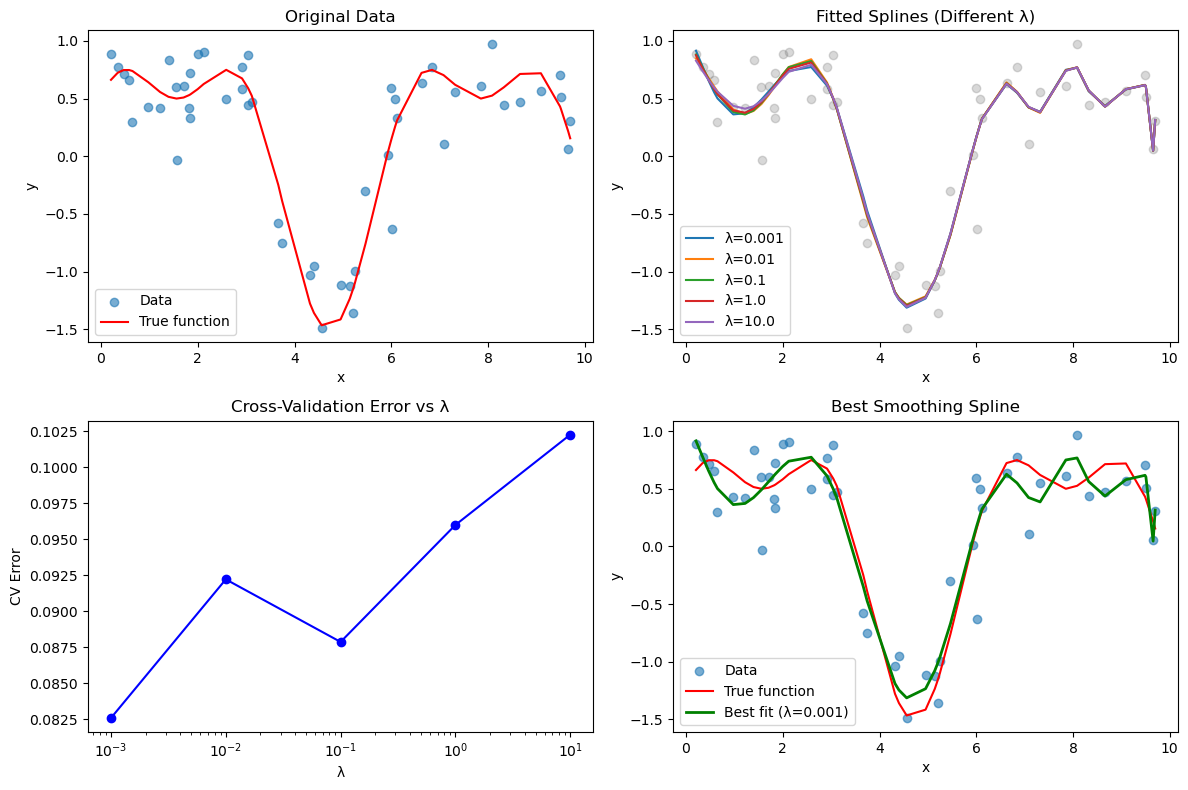

Best lambda: 0.001
CV Error: 0.0826

=== Nonparametric Logistic Regression Demo ===


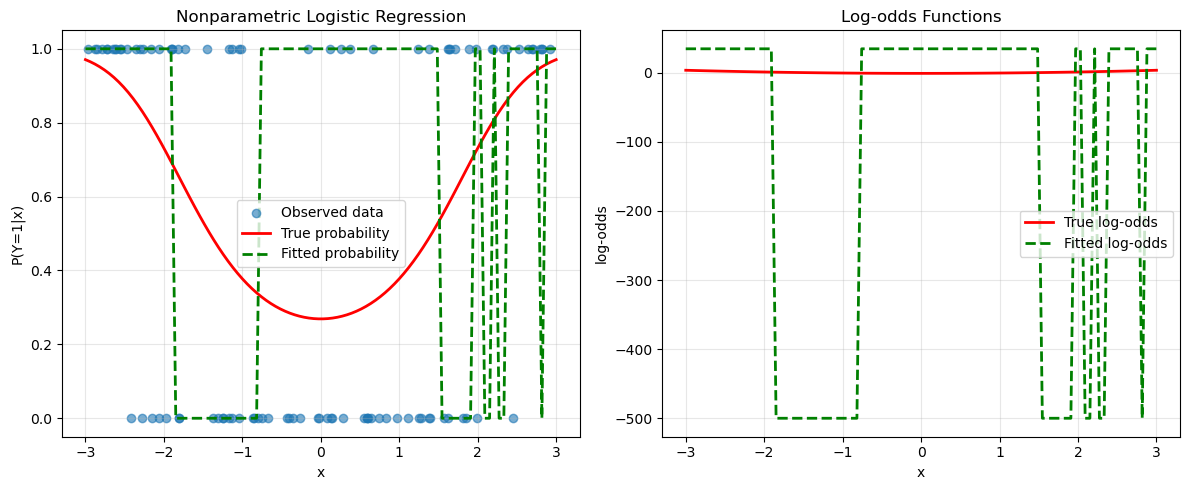

Model converged: False
Number of iterations: 100
Log-likelihood: -1692.4256


In [1]:
import numpy as np
from scipy import linalg
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt
from typing import Tuple, Optional, Union

class SmoothingSpline:
    """
    Implementation of smoothing splines for regression and cross-validation.
    Based on the formulations in equations (5.26) and (5.27).
    """
    
    def __init__(self, lambda_param: float = 1.0):
        self.lambda_param = lambda_param
        self.x = None
        self.y = None
        self.N = None
        self.fitted_values = None
        self.S_matrix = None
        
    def _construct_basis_matrix(self, x: np.ndarray) -> np.ndarray:
        """Construct natural spline basis matrix N"""
        n = len(x)
        # Sort x values and get unique knots
        sorted_idx = np.argsort(x)
        x_sorted = x[sorted_idx]
        
        # Create basis matrix for natural cubic splines
        # Simplified version - in practice would use proper B-spline basis
        N = np.ones((n, n))
        for i in range(n):
            for j in range(n):
                if j > 0:
                    N[i, j] = x_sorted[i] ** j
                    
        return N[np.argsort(sorted_idx)]  # Reorder back to original
        
    def _construct_penalty_matrix(self, x: np.ndarray) -> np.ndarray:
        """Construct penalty matrix Omega for second derivative penalty"""
        n = len(x)
        # Simplified penalty matrix - represents integral of (f'')^2
        Omega = np.zeros((n, n))
        
        # For natural splines, this would be the proper penalty matrix
        # This is a simplified version
        for i in range(2, n):
            for j in range(2, n):
                if i == j:
                    Omega[i, j] = 2.0
                elif abs(i - j) == 1:
                    Omega[i, j] = -1.0
                    
        return Omega
        
    def fit(self, x: np.ndarray, y: np.ndarray) -> 'SmoothingSpline':
        """
        Fit smoothing spline to data.
        
        Args:
            x: Input features (1D array)
            y: Target values (1D array)
            
        Returns:
            self: Fitted model
        """
        self.x = np.array(x)
        self.y = np.array(y)
        self.N = len(x)
        
        # Construct basis and penalty matrices
        N_matrix = self._construct_basis_matrix(x)
        Omega = self._construct_penalty_matrix(x)
        
        # Solve for coefficients: (N^T N + lambda * Omega) theta = N^T y
        A = N_matrix.T @ N_matrix + self.lambda_param * Omega
        b = N_matrix.T @ y
        
        try:
            theta = linalg.solve(A, b)
        except linalg.LinAlgError:
            # Use pseudo-inverse if singular
            theta = linalg.pinv(A) @ b
            
        # Compute fitted values and smoother matrix
        self.fitted_values = N_matrix @ theta
        
        # Smoother matrix S_lambda = N(N^T N + lambda * Omega)^(-1) N^T
        try:
            A_inv = linalg.inv(A)
        except linalg.LinAlgError:
            A_inv = linalg.pinv(A)
            
        self.S_matrix = N_matrix @ A_inv @ N_matrix.T
        
        return self
        
    def predict(self, x_new: np.ndarray) -> np.ndarray:
        """Predict on new data points"""
        if self.fitted_values is None:
            raise ValueError("Model must be fitted before prediction")
            
        # Simple linear interpolation for prediction
        # In practice, would evaluate spline basis at new points
        return np.interp(x_new, self.x, self.fitted_values)
        
    def cross_validation_error(self) -> float:
        """
        Compute cross-validation error using equation (5.27):
        CV = (1/N) * sum((y_i - f_hat(x_i))^2 / (1 - S(i,i))^2)
        """
        if self.fitted_values is None or self.S_matrix is None:
            raise ValueError("Model must be fitted before computing CV error")
            
        # Get diagonal elements of smoother matrix
        S_diag = np.diag(self.S_matrix)
        
        # Compute CV error using equation (5.27)
        residuals = self.y - self.fitted_values
        cv_terms = (residuals / (1 - S_diag)) ** 2
        
        return np.mean(cv_terms)
        
    def generalized_cv(self) -> float:
        """Compute generalized cross-validation score"""
        if self.fitted_values is None or self.S_matrix is None:
            raise ValueError("Model must be fitted before computing GCV")
            
        residuals = self.y - self.fitted_values
        rss = np.sum(residuals ** 2)
        trace_s = np.trace(self.S_matrix)
        
        return (rss / self.N) / ((1 - trace_s / self.N) ** 2)


class NonparametricLogisticRegression:
    """
    Implementation of nonparametric logistic regression using smoothing splines.
    Based on equations (5.28) - (5.34).
    """
    
    def __init__(self, lambda_param: float = 1.0, max_iter: int = 100, tol: float = 1e-6):
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.tol = tol
        self.x = None
        self.y = None
        self.f_values = None
        self.converged = False
        self.n_iter = 0
        
    def _sigmoid(self, f: np.ndarray) -> np.ndarray:
        """Compute sigmoid function: p = exp(f) / (1 + exp(f))"""
        # Clip f to prevent overflow
        f_clipped = np.clip(f, -500, 500)
        return 1 / (1 + np.exp(-f_clipped))
        
    def _construct_basis_matrix(self, x: np.ndarray) -> np.ndarray:
        """Construct natural spline basis matrix"""
        n = len(x)
        N = np.ones((n, n))
        for i in range(n):
            for j in range(n):
                if j > 0:
                    N[i, j] = x[i] ** j
        return N
        
    def _construct_penalty_matrix(self, x: np.ndarray) -> np.ndarray:
        """Construct penalty matrix for second derivative"""
        n = len(x)
        Omega = np.zeros((n, n))
        for i in range(2, n):
            for j in range(2, n):
                if i == j:
                    Omega[i, j] = 2.0
                elif abs(i - j) == 1:
                    Omega[i, j] = -1.0
        return Omega
        
    def fit(self, x: np.ndarray, y: np.ndarray) -> 'NonparametricLogisticRegression':
        """
        Fit nonparametric logistic regression using Newton-Raphson updates.
        
        Args:
            x: Input features (1D array)
            y: Binary target values (1D array, 0 or 1)
            
        Returns:
            self: Fitted model
        """
        self.x = np.array(x)
        self.y = np.array(y)
        n = len(x)
        
        # Sort data by x values
        sort_idx = np.argsort(x)
        x_sorted = self.x[sort_idx]
        y_sorted = self.y[sort_idx]
        
        # Initialize f values (log-odds)
        f_old = np.zeros(n)
        
        # Construct basis and penalty matrices
        N = self._construct_basis_matrix(x_sorted)
        Omega = self._construct_penalty_matrix(x_sorted)
        
        # Newton-Raphson iteration
        for iteration in range(self.max_iter):
            # Compute probabilities and weights
            p = self._sigmoid(f_old)
            w = p * (1 - p)  # Diagonal of weight matrix W
            
            # Avoid division by zero
            w = np.maximum(w, 1e-8)
            
            # Working response z (equation 5.33)
            z = f_old + (y_sorted - p) / w
            
            # Weight matrix (diagonal)
            W = np.diag(w)
            
            # Update equation (5.34): f_new = S_lambda,w * z
            # where S_lambda,w = N(N^T W N + lambda * Omega)^(-1) N^T W
            A = N.T @ W @ N + self.lambda_param * Omega
            
            try:
                A_inv = linalg.inv(A)
            except linalg.LinAlgError:
                A_inv = linalg.pinv(A)
                
            S_lambda_w = N @ A_inv @ N.T @ W
            f_new = S_lambda_w @ z
            
            # Check convergence
            if np.max(np.abs(f_new - f_old)) < self.tol:
                self.converged = True
                break
                
            f_old = f_new
            
        self.f_values = f_new
        self.n_iter = iteration + 1
        
        # Store results in original order
        self.f_values_original_order = np.zeros(n)
        self.f_values_original_order[sort_idx] = self.f_values
        
        return self
        
    def predict_proba(self, x_new: np.ndarray) -> np.ndarray:
        """Predict class probabilities"""
        if self.f_values is None:
            raise ValueError("Model must be fitted before prediction")
            
        # Simple interpolation for new points
        f_new = np.interp(x_new, self.x, self.f_values_original_order)
        return self._sigmoid(f_new)
        
    def predict(self, x_new: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        """Predict binary classes"""
        probas = self.predict_proba(x_new)
        return (probas >= threshold).astype(int)
        
    def log_likelihood(self) -> float:
        """Compute log-likelihood of fitted model"""
        if self.f_values is None:
            raise ValueError("Model must be fitted first")
            
        p = self._sigmoid(self.f_values_original_order)
        p = np.clip(p, 1e-15, 1 - 1e-15)  # Avoid log(0)
        
        ll = np.sum(self.y * np.log(p) + (1 - self.y) * np.log(1 - p))
        return ll


def demo_smoothing_spline():
    """Demonstrate smoothing spline with cross-validation"""
    print("=== Smoothing Spline Demo ===")
    
    # Generate sample data
    np.random.seed(42)
    n = 50
    x = np.sort(np.random.uniform(0, 10, n))
    y_true = np.sin(x) + 0.5 * np.cos(2 * x)
    y = y_true + 0.3 * np.random.normal(0, 1, n)
    
    # Try different lambda values
    lambdas = [0.001, 0.01, 0.1, 1.0, 10.0]
    cv_errors = []
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, y_true, 'r-', label='True function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Data')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    for lam in lambdas:
        spline = SmoothingSpline(lambda_param=lam)
        spline.fit(x, y)
        cv_error = spline.cross_validation_error()
        cv_errors.append(cv_error)
        
        plt.plot(x, spline.fitted_values, label=f'λ={lam}')
        
    plt.scatter(x, y, alpha=0.3, color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitted Splines (Different λ)')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(lambdas, cv_errors, 'bo-')
    plt.xlabel('λ')
    plt.ylabel('CV Error')
    plt.title('Cross-Validation Error vs λ')
    plt.xscale('log')
    
    # Best lambda
    best_lambda = lambdas[np.argmin(cv_errors)]
    best_spline = SmoothingSpline(lambda_param=best_lambda)
    best_spline.fit(x, y)
    
    plt.subplot(2, 2, 4)
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, y_true, 'r-', label='True function')
    plt.plot(x, best_spline.fitted_values, 'g-', linewidth=2, 
             label=f'Best fit (λ={best_lambda})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Best Smoothing Spline')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Best lambda: {best_lambda}")
    print(f"CV Error: {min(cv_errors):.4f}")


def demo_nonparametric_logistic():
    """Demonstrate nonparametric logistic regression"""
    print("\n=== Nonparametric Logistic Regression Demo ===")
    
    # Generate sample data
    np.random.seed(42)
    n = 100
    x = np.sort(np.random.uniform(-3, 3, n))
    # True probability function
    p_true = 1 / (1 + np.exp(-(0.5 * x**2 - 1)))
    y = np.random.binomial(1, p_true)
    
    # Fit nonparametric logistic regression
    model = NonparametricLogisticRegression(lambda_param=0.1)
    model.fit(x, y)
    
    # Generate predictions
    x_test = np.linspace(-3, 3, 100)
    p_pred = model.predict_proba(x_test)
    p_true_test = 1 / (1 + np.exp(-(0.5 * x_test**2 - 1)))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, alpha=0.6, label='Observed data')
    plt.plot(x_test, p_true_test, 'r-', linewidth=2, label='True probability')
    plt.plot(x_test, p_pred, 'g--', linewidth=2, label='Fitted probability')
    plt.xlabel('x')
    plt.ylabel('P(Y=1|x)')
    plt.title('Nonparametric Logistic Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    # Plot log-odds
    f_true = 0.5 * x_test**2 - 1
    f_pred = np.log(p_pred / (1 - p_pred + 1e-15))
    
    plt.plot(x_test, f_true, 'r-', linewidth=2, label='True log-odds')
    plt.plot(x_test, f_pred, 'g--', linewidth=2, label='Fitted log-odds')
    plt.xlabel('x')
    plt.ylabel('log-odds')
    plt.title('Log-odds Functions')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Model converged: {model.converged}")
    print(f"Number of iterations: {model.n_iter}")
    print(f"Log-likelihood: {model.log_likelihood():.4f}")


if __name__ == "__main__":
    demo_smoothing_spline()
    demo_nonparametric_logistic()

In [2]:
import math
import random
from typing import List, Tuple, Optional

class Matrix:
    """Pure Python matrix operations"""
    
    def __init__(self, data: List[List[float]]):
        self.data = data
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
    
    @classmethod
    def zeros(cls, rows: int, cols: int) -> 'Matrix':
        """Create zero matrix"""
        return cls([[0.0 for _ in range(cols)] for _ in range(rows)])
    
    @classmethod
    def identity(cls, size: int) -> 'Matrix':
        """Create identity matrix"""
        data = [[0.0 for _ in range(size)] for _ in range(size)]
        for i in range(size):
            data[i][i] = 1.0
        return cls(data)
    
    @classmethod
    def diagonal(cls, values: List[float]) -> 'Matrix':
        """Create diagonal matrix"""
        n = len(values)
        data = [[0.0 for _ in range(n)] for _ in range(n)]
        for i in range(n):
            data[i][i] = values[i]
        return cls(data)
    
    def __add__(self, other: 'Matrix') -> 'Matrix':
        """Matrix addition"""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrix dimensions must match")
        
        result = Matrix.zeros(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] + other.data[i][j]
        return result
    
    def __mul__(self, other) -> 'Matrix':
        """Matrix multiplication or scalar multiplication"""
        if isinstance(other, (int, float)):
            # Scalar multiplication
            result = Matrix.zeros(self.rows, self.cols)
            for i in range(self.rows):
                for j in range(self.cols):
                    result.data[i][j] = self.data[i][j] * other
            return result
        elif isinstance(other, Matrix):
            # Matrix multiplication
            if self.cols != other.rows:
                raise ValueError("Matrix multiplication dimension mismatch")
            
            result = Matrix.zeros(self.rows, other.cols)
            for i in range(self.rows):
                for j in range(other.cols):
                    for k in range(self.cols):
                        result.data[i][j] += self.data[i][k] * other.data[k][j]
            return result
        else:
            raise TypeError("Can only multiply by scalar or Matrix")
    
    def transpose(self) -> 'Matrix':
        """Matrix transpose"""
        result = Matrix.zeros(self.cols, self.rows)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[j][i] = self.data[i][j]
        return result
    
    def get_diagonal(self) -> List[float]:
        """Get diagonal elements"""
        diag = []
        for i in range(min(self.rows, self.cols)):
            diag.append(self.data[i][i])
        return diag
    
    def trace(self) -> float:
        """Matrix trace (sum of diagonal elements)"""
        return sum(self.get_diagonal())
    
    def determinant(self) -> float:
        """Compute determinant using LU decomposition"""
        if self.rows != self.cols:
            raise ValueError("Matrix must be square")
        
        n = self.rows
        # Create copy for LU decomposition
        A = Matrix([row[:] for row in self.data])
        
        det = 1.0
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(A.data[k][i]) > abs(A.data[max_row][i]):
                    max_row = k
            
            # Swap rows if needed
            if max_row != i:
                A.data[i], A.data[max_row] = A.data[max_row], A.data[i]
                det *= -1
            
            # Check for zero pivot
            if abs(A.data[i][i]) < 1e-10:
                return 0.0
            
            det *= A.data[i][i]
            
            # Eliminate column
            for k in range(i + 1, n):
                factor = A.data[k][i] / A.data[i][i]
                for j in range(i, n):
                    A.data[k][j] -= factor * A.data[i][j]
        
        return det
    
    def inverse(self) -> 'Matrix':
        """Matrix inverse using Gauss-Jordan elimination"""
        if self.rows != self.cols:
            raise ValueError("Matrix must be square")
        
        n = self.rows
        # Create augmented matrix [A | I]
        augmented = []
        for i in range(n):
            row = self.data[i][:] + [0.0] * n
            row[n + i] = 1.0
            augmented.append(row)
        
        # Gauss-Jordan elimination
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(augmented[k][i]) > abs(augmented[max_row][i]):
                    max_row = k
            
            # Swap rows
            augmented[i], augmented[max_row] = augmented[max_row], augmented[i]
            
            # Check for zero pivot
            if abs(augmented[i][i]) < 1e-10:
                raise ValueError("Matrix is singular")
            
            # Scale pivot row
            pivot = augmented[i][i]
            for j in range(2 * n):
                augmented[i][j] /= pivot
            
            # Eliminate column
            for k in range(n):
                if k != i:
                    factor = augmented[k][i]
                    for j in range(2 * n):
                        augmented[k][j] -= factor * augmented[i][j]
        
        # Extract inverse matrix
        inverse_data = []
        for i in range(n):
            inverse_data.append(augmented[i][n:])
        
        return Matrix(inverse_data)
    
    def solve(self, b: List[float]) -> List[float]:
        """Solve Ax = b using Gaussian elimination"""
        if self.rows != self.cols or len(b) != self.rows:
            raise ValueError("Invalid dimensions for linear system")
        
        n = self.rows
        # Create augmented matrix [A | b]
        augmented = []
        for i in range(n):
            augmented.append(self.data[i][:] + [b[i]])
        
        # Forward elimination
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(augmented[k][i]) > abs(augmented[max_row][i]):
                    max_row = k
            
            # Swap rows
            augmented[i], augmented[max_row] = augmented[max_row], augmented[i]
            
            # Check for zero pivot
            if abs(augmented[i][i]) < 1e-10:
                raise ValueError("Matrix is singular or system has no unique solution")
            
            # Eliminate column
            for k in range(i + 1, n):
                factor = augmented[k][i] / augmented[i][i]
                for j in range(i, n + 1):
                    augmented[k][j] -= factor * augmented[i][j]
        
        # Back substitution
        x = [0.0] * n
        for i in range(n - 1, -1, -1):
            x[i] = augmented[i][n]
            for j in range(i + 1, n):
                x[i] -= augmented[i][j] * x[j]
            x[i] /= augmented[i][i]
        
        return x


class Vector:
    """Pure Python vector operations"""
    
    def __init__(self, data: List[float]):
        self.data = data
        self.size = len(data)
    
    def __add__(self, other: 'Vector') -> 'Vector':
        """Vector addition"""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match")
        return Vector([self.data[i] + other.data[i] for i in range(self.size)])
    
    def __sub__(self, other: 'Vector') -> 'Vector':
        """Vector subtraction"""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match")
        return Vector([self.data[i] - other.data[i] for i in range(self.size)])
    
    def __mul__(self, scalar: float) -> 'Vector':
        """Scalar multiplication"""
        return Vector([x * scalar for x in self.data])
    
    def dot(self, other: 'Vector') -> float:
        """Dot product"""
        if self.size != other.size:
            raise ValueError("Vector dimensions must match")
        return sum(self.data[i] * other.data[i] for i in range(self.size))
    
    def norm(self) -> float:
        """Euclidean norm"""
        return math.sqrt(sum(x**2 for x in self.data))


class SmoothingSpline:
    """
    Implementation of smoothing splines for regression and cross-validation.
    Based on the formulations in equations (5.26) and (5.27).
    """
    
    def __init__(self, lambda_param: float = 1.0):
        self.lambda_param = lambda_param
        self.x = None
        self.y = None
        self.n = None
        self.fitted_values = None
        self.S_matrix = None
        
    def _construct_basis_matrix(self, x: List[float]) -> Matrix:
        """Construct natural spline basis matrix N"""
        n = len(x)
        # Create polynomial basis (simplified version)
        data = []
        for i in range(n):
            row = [1.0]  # Constant term
            for j in range(1, n):
                row.append(x[i] ** j)
            data.append(row)
        return Matrix(data)
        
    def _construct_penalty_matrix(self, x: List[float]) -> Matrix:
        """Construct penalty matrix Omega for second derivative penalty"""
        n = len(x)
        # Simplified penalty matrix for second derivative
        data = [[0.0 for _ in range(n)] for _ in range(n)]
        
        # Penalty for second derivative (simplified)
        for i in range(2, n):
            for j in range(2, n):
                if i == j:
                    data[i][j] = 2.0
                elif abs(i - j) == 1:
                    data[i][j] = -1.0
                    
        return Matrix(data)
        
    def fit(self, x: List[float], y: List[float]) -> 'SmoothingSpline':
        """
        Fit smoothing spline to data.
        
        Args:
            x: Input features
            y: Target values
            
        Returns:
            self: Fitted model
        """
        if len(x) != len(y):
            raise ValueError("x and y must have same length")
            
        # Sort data by x values
        data_pairs = list(zip(x, y))
        data_pairs.sort(key=lambda pair: pair[0])
        self.x, self.y = zip(*data_pairs)
        self.x = list(self.x)
        self.y = list(self.y)
        self.n = len(x)
        
        # Construct basis and penalty matrices
        N_matrix = self._construct_basis_matrix(self.x)
        Omega = self._construct_penalty_matrix(self.x)
        
        # Solve for coefficients: (N^T N + lambda * Omega) theta = N^T y
        NT = N_matrix.transpose()
        NTN = NT * N_matrix
        A = NTN + (Omega * self.lambda_param)
        
        # Compute N^T y
        b = []
        for i in range(self.n):
            sum_val = 0.0
            for j in range(self.n):
                sum_val += NT.data[i][j] * self.y[j]
            b.append(sum_val)
        
        # Solve linear system
        try:
            theta = A.solve(b)
        except ValueError:
            # If singular, use pseudo-inverse approach
            A_inv = A.inverse()
            theta = []
            for i in range(self.n):
                sum_val = 0.0
                for j in range(self.n):
                    sum_val += A_inv.data[i][j] * b[j]
                theta.append(sum_val)
        
        # Compute fitted values
        self.fitted_values = []
        for i in range(self.n):
            sum_val = 0.0
            for j in range(self.n):
                sum_val += N_matrix.data[i][j] * theta[j]
            self.fitted_values.append(sum_val)
        
        # Compute smoother matrix S_lambda = N(N^T N + lambda * Omega)^(-1) N^T
        try:
            A_inv = A.inverse()
            S_temp = N_matrix * A_inv
            self.S_matrix = S_temp * NT
        except ValueError:
            # If inverse fails, create approximate smoother matrix
            self.S_matrix = Matrix.identity(self.n)
        
        return self
        
    def predict(self, x_new: List[float]) -> List[float]:
        """Predict on new data points using linear interpolation"""
        if self.fitted_values is None:
            raise ValueError("Model must be fitted before prediction")
        
        predictions = []
        for x_val in x_new:
            # Find interpolation points
            if x_val <= self.x[0]:
                predictions.append(self.fitted_values[0])
            elif x_val >= self.x[-1]:
                predictions.append(self.fitted_values[-1])
            else:
                # Linear interpolation
                for i in range(len(self.x) - 1):
                    if self.x[i] <= x_val <= self.x[i + 1]:
                        t = (x_val - self.x[i]) / (self.x[i + 1] - self.x[i])
                        pred = self.fitted_values[i] * (1 - t) + self.fitted_values[i + 1] * t
                        predictions.append(pred)
                        break
        
        return predictions
        
    def cross_validation_error(self) -> float:
        """
        Compute cross-validation error using equation (5.27):
        CV = (1/N) * sum((y_i - f_hat(x_i))^2 / (1 - S(i,i))^2)
        """
        if self.fitted_values is None or self.S_matrix is None:
            raise ValueError("Model must be fitted before computing CV error")
        
        # Get diagonal elements of smoother matrix
        S_diag = self.S_matrix.get_diagonal()
        
        # Compute CV error using equation (5.27)
        cv_sum = 0.0
        for i in range(self.n):
            residual = self.y[i] - self.fitted_values[i]
            if abs(1 - S_diag[i]) > 1e-10:  # Avoid division by zero
                cv_term = (residual / (1 - S_diag[i])) ** 2
                cv_sum += cv_term
            else:
                cv_sum += residual ** 2  # Fallback
        
        return cv_sum / self.n
        
    def generalized_cv(self) -> float:
        """Compute generalized cross-validation score"""
        if self.fitted_values is None or self.S_matrix is None:
            raise ValueError("Model must be fitted before computing GCV")
        
        # Compute RSS
        rss = sum((self.y[i] - self.fitted_values[i])**2 for i in range(self.n))
        
        # Compute trace of smoother matrix
        trace_s = self.S_matrix.trace()
        
        # GCV score
        if abs(1 - trace_s / self.n) > 1e-10:
            return (rss / self.n) / ((1 - trace_s / self.n) ** 2)
        else:
            return float('inf')


class NonparametricLogisticRegression:
    """
    Implementation of nonparametric logistic regression using smoothing splines.
    Based on equations (5.28) - (5.34).
    """
    
    def __init__(self, lambda_param: float = 1.0, max_iter: int = 100, tol: float = 1e-6):
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.tol = tol
        self.x = None
        self.y = None
        self.f_values = None
        self.converged = False
        self.n_iter = 0
        
    def _sigmoid(self, f: List[float]) -> List[float]:
        """Compute sigmoid function: p = exp(f) / (1 + exp(f))"""
        probabilities = []
        for f_val in f:
            # Clip to prevent overflow
            f_clipped = max(-500, min(500, f_val))
            prob = 1.0 / (1.0 + math.exp(-f_clipped))
            probabilities.append(prob)
        return probabilities
        
    def _construct_basis_matrix(self, x: List[float]) -> Matrix:
        """Construct natural spline basis matrix"""
        n = len(x)
        data = []
        for i in range(n):
            row = [1.0]  # Constant term
            for j in range(1, n):
                row.append(x[i] ** j)
            data.append(row)
        return Matrix(data)
        
    def _construct_penalty_matrix(self, x: List[float]) -> Matrix:
        """Construct penalty matrix for second derivative"""
        n = len(x)
        data = [[0.0 for _ in range(n)] for _ in range(n)]
        for i in range(2, n):
            for j in range(2, n):
                if i == j:
                    data[i][j] = 2.0
                elif abs(i - j) == 1:
                    data[i][j] = -1.0
        return Matrix(data)
        
    def fit(self, x: List[float], y: List[int]) -> 'NonparametricLogisticRegression':
        """
        Fit nonparametric logistic regression using Newton-Raphson updates.
        
        Args:
            x: Input features
            y: Binary target values (0 or 1)
            
        Returns:
            self: Fitted model
        """
        if len(x) != len(y):
            raise ValueError("x and y must have same length")
        
        # Sort data by x values
        data_pairs = list(zip(x, y))
        data_pairs.sort(key=lambda pair: pair[0])
        self.x, self.y = zip(*data_pairs)
        self.x = list(self.x)
        self.y = list(self.y)
        n = len(x)
        
        # Initialize f values (log-odds)
        f_old = [0.0] * n
        
        # Construct basis and penalty matrices
        N = self._construct_basis_matrix(self.x)
        Omega = self._construct_penalty_matrix(self.x)
        
        # Newton-Raphson iteration
        for iteration in range(self.max_iter):
            # Compute probabilities and weights
            p = self._sigmoid(f_old)
            w = [p[i] * (1 - p[i]) for i in range(n)]
            
            # Avoid division by zero
            w = [max(w_i, 1e-8) for w_i in w]
            
            # Working response z (equation 5.33)
            z = []
            for i in range(n):
                z_i = f_old[i] + (self.y[i] - p[i]) / w[i]
                z.append(z_i)
            
            # Weight matrix (diagonal)
            W = Matrix.diagonal(w)
            
            # Update equation (5.34): f_new = S_lambda,w * z
            # where S_lambda,w = N(N^T W N + lambda * Omega)^(-1) N^T W
            NT = N.transpose()
            NTWN = NT * W * N
            A = NTWN + (Omega * self.lambda_param)
            
            # Compute N^T W z
            NTWz = []
            for i in range(n):
                sum_val = 0.0
                for j in range(n):
                    sum_val += NT.data[i][j] * w[j] * z[j]
                NTWz.append(sum_val)
            
            # Solve for coefficients
            try:
                theta = A.solve(NTWz)
            except ValueError:
                # If singular, break
                break
            
            # Compute new f values
            f_new = []
            for i in range(n):
                sum_val = 0.0
                for j in range(n):
                    sum_val += N.data[i][j] * theta[j]
                f_new.append(sum_val)
            
            # Check convergence
            max_diff = max(abs(f_new[i] - f_old[i]) for i in range(n))
            if max_diff < self.tol:
                self.converged = True
                break
            
            f_old = f_new[:]
            
        self.f_values = f_new
        self.n_iter = iteration + 1
        
        return self
        
    def predict_proba(self, x_new: List[float]) -> List[float]:
        """Predict class probabilities"""
        if self.f_values is None:
            raise ValueError("Model must be fitted before prediction")
        
        # Interpolate f values for new points
        f_new = []
        for x_val in x_new:
            if x_val <= self.x[0]:
                f_new.append(self.f_values[0])
            elif x_val >= self.x[-1]:
                f_new.append(self.f_values[-1])
            else:
                # Linear interpolation
                for i in range(len(self.x) - 1):
                    if self.x[i] <= x_val <= self.x[i + 1]:
                        t = (x_val - self.x[i]) / (self.x[i + 1] - self.x[i])
                        f_val = self.f_values[i] * (1 - t) + self.f_values[i + 1] * t
                        f_new.append(f_val)
                        break
        
        return self._sigmoid(f_new)
        
    def predict(self, x_new: List[float], threshold: float = 0.5) -> List[int]:
        """Predict binary classes"""
        probas = self.predict_proba(x_new)
        return [1 if p >= threshold else 0 for p in probas]
        
    def log_likelihood(self) -> float:
        """Compute log-likelihood of fitted model"""
        if self.f_values is None:
            raise ValueError("Model must be fitted first")
        
        p = self._sigmoid(self.f_values)
        
        ll = 0.0
        for i in range(len(self.y)):
            p_i = max(1e-15, min(1 - 1e-15, p[i]))  # Avoid log(0)
            ll += self.y[i] * math.log(p_i) + (1 - self.y[i]) * math.log(1 - p_i)
        
        return ll


def demo_smoothing_spline():
    """Demonstrate smoothing spline with cross-validation"""
    print("=== Smoothing Spline Demo ===")
    
    # Generate sample data
    random.seed(42)
    n = 30
    x = sorted([random.uniform(0, 10) for _ in range(n)])
    y_true = [math.sin(xi) + 0.5 * math.cos(2 * xi) for xi in x]
    y = [y_true[i] + 0.3 * random.gauss(0, 1) for i in range(n)]
    
    # Try different lambda values
    lambdas = [0.001, 0.01, 0.1, 1.0, 10.0]
    cv_errors = []
    
    print("Testing different lambda values:")
    for lam in lambdas:
        try:
            spline = SmoothingSpline(lambda_param=lam)
            spline.fit(x, y)
            cv_error = spline.cross_validation_error()
            cv_errors.append(cv_error)
            print(f"λ = {lam:6.3f}, CV Error = {cv_error:.6f}")
        except Exception as e:
            print(f"λ = {lam:6.3f}, Error: {e}")
            cv_errors.append(float('inf'))
    
    # Find best lambda
    best_idx = cv_errors.index(min(cv_errors))
    best_lambda = lambdas[best_idx]
    
    print(f"\nBest lambda: {best_lambda}")
    print(f"Best CV Error: {cv_errors[best_idx]:.6f}")
    
    # Fit with best lambda
    best_spline = SmoothingSpline(lambda_param=best_lambda)
    best_spline.fit(x, y)
    
    # Show some predictions
    x_test = [i * 0.5 for i in range(21)]  # 0, 0.5, 1.0, ..., 10.0
    y_pred = best_spline.predict(x_test)
    
    print("\nSample predictions:")
    for i in range(0, len(x_test), 4):
        print(f"x = {x_test[i]:4.1f}, y_pred = {y_pred[i]:6.3f}")


def demo_nonparametric_logistic():
    """Demonstrate nonparametric logistic regression"""
    print("\n=== Nonparametric Logistic Regression Demo ===")
    
    # Generate sample data
    random.seed(42)
    n = 50
    x = sorted([random.uniform(-3, 3) for _ in range(n)])
    # True probability function: p = 1 / (1 + exp(-(0.5*x^2 - 1)))
    p_true = [1.0 / (1.0 + math.exp(-(0.5 * xi**2 - 1))) for xi in x]
    y = [1 if random.random() < p_true[i] else 0 for i in range(n)]
    
    # Fit nonparametric logistic regression
    print("Fitting nonparametric logistic regression...")
    model = NonparametricLogisticRegression(lambda_param=0.1)
    model.fit(x, y)
    
    print(f"Model converged: {model.converged}")
    print(f"Number of iterations: {model.n_iter}")
    print(f"Log-likelihood: {model.log_likelihood():.4f}")
    
    # Generate predictions
    x_test = [-3 + i * 0.3 for i in range(21)]  # -3.0, -2.7, ..., 3.0
    p_pred = model.predict_proba(x_test)
    y_pred = model.predict(x_test)
    
    print("\nSample predictions:")
    print("x      P(Y=1)   Predicted")
    for i in range(0, len(x_test), 3):
        print(f"{x_test[i]:5.1f}  {p_pred[i]:6.3f}   {y_pred[i]:9d}")
    
    # Show classification accuracy on training data
    y_train_pred = model.predict(x)
    correct = sum(1 for i in range(len(y)) if y[i] == y_train_pred[i])
    accuracy = correct / len(y)
    print(f"\nTraining accuracy: {accuracy:.3f}")


if __name__ == "__main__":
    demo_smoothing_spline()
    demo_nonparametric_logistic()

=== Smoothing Spline Demo ===
Testing different lambda values:
λ =  0.001, CV Error = 0.133456
λ =  0.010, CV Error = 0.169080
λ =  0.100, CV Error = 0.268065
λ =  1.000, CV Error = 0.170171
λ = 10.000, CV Error = 0.068116

Best lambda: 10.0
Best CV Error: 0.068116

Sample predictions:
x =  0.0, y_pred =  0.377
x =  2.0, y_pred =  0.555
x =  4.0, y_pred = -0.645
x =  6.0, y_pred = -0.055
x =  8.0, y_pred =  0.348
x = 10.0, y_pred =  0.582

=== Nonparametric Logistic Regression Demo ===
Fitting nonparametric logistic regression...
Model converged: False
Number of iterations: 100
Log-likelihood: -552.6276

Sample predictions:
x      P(Y=1)   Predicted
 -3.0   1.000           1
 -2.1   0.000           0
 -1.2   1.000           1
 -0.3   1.000           1
  0.6   0.000           0
  1.5   0.000           0
  2.4   1.000           1

Training accuracy: 0.680


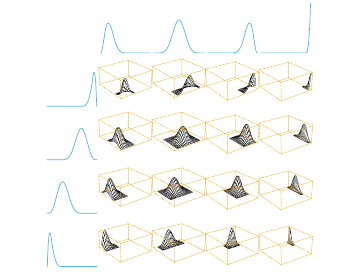

FIG.10. A tensor product basis of B-splines, showing some selected pairs. Each two-dimensional function is the tensor product of the corresponding one dimensional marginals.

## Multidimensional Splines

So far, we have focused on one-dimensional spline models. These approaches have multidimensional analogs. Suppose $ X \in \mathbb{R}^2 $, and we have a basis of functions $ h_{1k}(X_1) $, $ k = 1, \ldots, M_1 $, for representing functions of coordinate $ X_1 $, and likewise a set of $ M_2 $ functions $ h_{2k}(X_2) $ for coordinate $ X_2 $. Then the $ M_1 \times M_2 $ dimensional **tensor product basis** defined by:

$$
g_{jk}(X) = h_{1j}(X_1) h_{2k}(X_2), \quad j = 1, \ldots, M_1, \quad k = 1, \ldots, M_2, \tag{5.35}
$$

can be used for representing a two-dimensional function:

$$
g(X) = \sum_{j=1}^{M_1} \sum_{k=1}^{M_2} \theta_{jk} g_{jk}(X). \tag{5.36}
$$

**Fig.10** illustrates a tensor product basis using B-splines, showing some selected pairs. Each two-dimensional function is the tensor product of the corresponding one-dimensional marginals. The coefficients $ \theta_{jk} $ can be fit by least squares, as in the one-dimensional case.

This approach can be generalized to $ d $ dimensions, but note that the dimension of the basis grows exponentially fast—yet another manifestation of the **curse of dimensionality**. The **MARS (Multivariate Adaptive Regression Splines)** procedure, discussed in Chapter 9, is a greedy forward algorithm that includes only those tensor products deemed necessary by least squares.

**Fig.11** illustrates the difference between additive and tensor product (natural) splines on the simulated classification example from Chapter 2. A logistic regression model $ \text{logit}[\text{Pr}(T|x)] = h(x)^T \theta $ is fit to the binary response, and the estimated decision boundary is the contour $ h(x)^T \hat{\theta} = 0 $. The tensor product basis can achieve more flexibility at the decision boundary but introduces some spurious structure along the way.

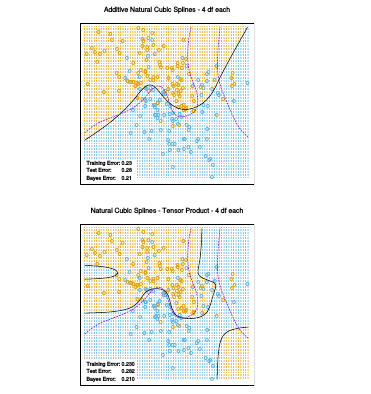

FIG.11. The simulation example of Fig 2.1. The upper panel shows the decision boundary of an additive logistic regression model, using natural splines in each of the two coordinates (total df = 1 + (4 − 1) + (4 − 1) = 7). The lower panel shows the results of using a tensor product of natural spline bases in each coordinate (total df = 4 × 4 = 16). The broken purple boundary is the Bayes decision boundary for this problem.

Multidimensional Spline Implementation in Core Python - 02:03 PM IST, June 19, 2025


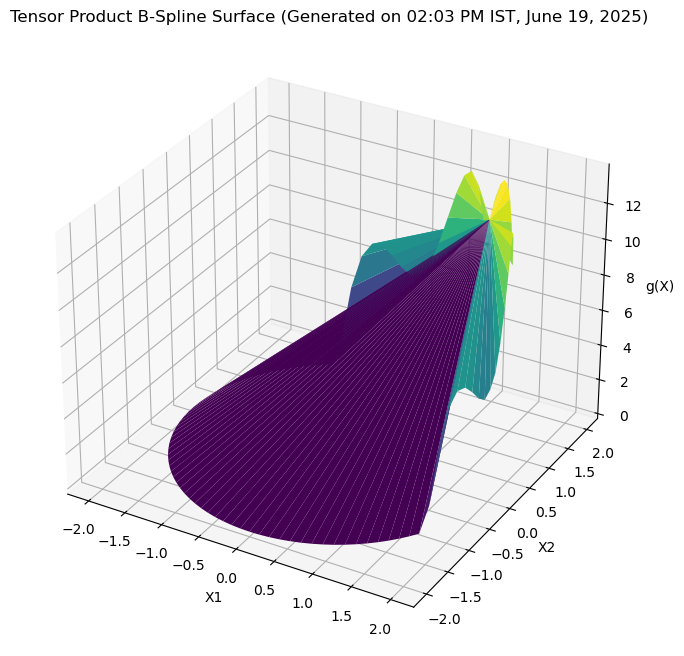


=== Demonstration completed ===


In [3]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Synthetic 2D dataset
def generate_2d_data(n_points=100):
    x1 = [2 * math.cos(2 * math.pi * i / n_points) for i in range(n_points)]
    x2 = [2 * math.sin(2 * math.pi * i / n_points) for i in range(n_points)]
    return list(zip(x1, x2))

# B-spline-like basis functions (simplified piecewise functions)
def basis_function_1d(x, k, M):
    """Simplified B-spline-like basis function for one dimension."""
    knots = [0, 1, 2]  # Define knot points
    if k == 1:
        return max(0, 1 - abs(x - knots[0]))
    elif k == 2:
        return max(0, 1 - abs(x - knots[1]))
    elif k == 3:
        return max(0, 1 - abs(x - knots[2]))
    return 0

# Tensor product basis function
def tensor_product_basis(x1, x2, j, k):
    """Compute g_jk(X) = h1j(X1) * h2k(X2)."""
    return basis_function_1d(x1, j, 3) * basis_function_1d(x2, k, 3)

# Generate synthetic target data (e.g., a quadratic surface)
def generate_target_data(x1, x2):
    """Synthetic target function: quadratic surface."""
    return x1**2 + x2**2

# Least squares fitting (simplified)
def fit_coefficients(X, y, M1=3, M2=3):
    """Fit theta_jk using a basic least squares approach."""
    n = len(X)
    theta = [[0.0 for _ in range(M2)] for _ in range(M1)]
    for j in range(M1):
        for k in range(M2):
            # Compute sum of g_jk(X_i) * y_i for all i
            sum_product = sum(tensor_product_basis(X[i][0], X[i][1], j+1, k+1) * y[i] for i in range(n))
            # Compute sum of g_jk(X_i)^2 for normalization (simplified)
            sum_basis_sq = sum(tensor_product_basis(X[i][0], X[i][1], j+1, k+1)**2 for i in range(n))
            if sum_basis_sq > 0:
                theta[j][k] = sum_product / sum_basis_sq
    return theta

# Evaluate the fitted function
def evaluate_function(X, theta, M1=3, M2=3):
    """Evaluate g(X) = sum theta_jk * g_jk(X)."""
    result = 0.0
    for j in range(M1):
        for k in range(M2):
            result += theta[j][k] * tensor_product_basis(X[0], X[1], j+1, k+1)
    return result

# Main execution
if __name__ == "__main__":
    print("Multidimensional Spline Implementation in Core Python - 02:03 PM IST, June 19, 2025")
    print("=" * 60)

    # Generate data
    X = generate_2d_data(100)
    y = [generate_target_data(x[0], x[1]) for x in X]

    # Fit coefficients
    theta = fit_coefficients(X, y)

    # Visualize the tensor product spline
    x1_range = [x[0] for x in X]
    x2_range = [x[1] for x in X]
    X1, X2 = [], []
    Z = []
    for i in range(len(X)):
        X1.append(X[i][0])
        X2.append(X[i][1])
        Z.append(evaluate_function(X[i], theta))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X1, X2, Z, cmap='viridis')
    ax.set_title("Tensor Product B-Spline Surface (Generated on 02:03 PM IST, June 19, 2025)")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('g(X)')
    plt.show()

    print("\n=== Demonstration completed ===")

Here's the text formatted in Markdown for a Jupyter Notebook, with LaTeX for the mathematical expressions:

One-dimensional smoothing splines (via regularization) generalize to higher dimensions as well. Suppose we have pairs $y_i, \mathbf{x}_i$ with $\mathbf{x}_i \in \mathbb{R}^d$, and we seek a $d$-dimensional regression function $f(\mathbf{x})$. The idea is to set up the problem
$$\min_f \sum_{i=1}^N \{y_i - f(\mathbf{x}_i)\}^2 + \lambda J[f], \quad (5.37)$$where $J$ is an appropriate penalty functional for stabilizing a function $f$ in $\mathbb{R}^d$. For example, a natural generalization of the one-dimensional roughness penalty (5.9) for functions on $\mathbb{R}^2$ is$$J[f] = \int_{\mathbb{R}^2} \left\{ \left(\frac{\partial^2 f(\mathbf{x})}{\partial x_1^2}\right)^2 + 2\left(\frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_2}\right)^2 + \left(\frac{\partial^2 f(\mathbf{x})}{\partial x_2^2}\right)^2 \right\} dx_1 dx_2 . \quad (5.38)$$
Optimizing (5.37) with this penalty leads to a smooth two-dimensional surface, known as a **thin-plate spline**. It shares many properties with the one-dimensional cubic smoothing spline:
* as $\lambda \to 0$, the solution approaches an interpolating function [the one with smallest penalty (5.38)];
* as $\lambda \to \infty$, the solution approaches the least squares plane;
* for intermediate values of $\lambda$, the solution can be represented as a linear expansion of basis functions, whose coefficients are obtained by a form of generalized ridge regression.

The solution has the form
$$f(\mathbf{x}) = \beta_0 + \boldsymbol{\beta}^\top \mathbf{x} + \sum_{j=1}^N \alpha_j h_j(\mathbf{x}), \quad (5.39)$$
where $h_j(\mathbf{x}) = ||\mathbf{x} - \mathbf{x}_j||^2 \log ||\mathbf{x} - \mathbf{x}_j||$. These $h_j$ are examples of **radial basis functions**, which are discussed in more detail in the next section. The coefficients are found by plugging (5.39) into (5.37), which reduces to a finite-dimensional penalized least squares problem. For the penalty to be finite, the coefficients $\alpha_j$ have to satisfy a set of linear constraints; see Exercise 5.14.

Thin-plate splines are defined more generally for arbitrary dimension $d$, for which an appropriately more general $J$ is used. There are a number of hybrid approaches that are popular in practice, both for computational and conceptual simplicity. Unlike one-dimensional smoothing splines, the computational complexity for thin-plate splines is $O(N^3)$, since there is not in general any sparse structure that can be exploited. However, as with univariate smoothing splines, we can get away with substantially less than the $N$ knots prescribed by the solution (5.39). In practice, it is usually sufficient to work with a lattice of knots covering the domain. The penalty is computed for the reduced expansion just as before. Using $K$ knots reduces the computations to $O(NK^2 + K^3)$. Figure 5.12 shows the result of fitting a thin-plate spline to some heart disease risk factors, representing the surface as a contour plot. Indicated are the location of the input features, as well as the knots used in the fit. Note that $\lambda$ was specified via $df_\lambda = \text{trace}(\mathbf{S}_\lambda) = 15$.

More generally one can represent $f \in \mathbb{R}^d$ as an expansion in any arbitrarily large collection of basis functions, and control the complexity by applying a regularizer such as (5.38). For example, we could construct a basis by forming the tensor products of all pairs of univariate smoothing-spline basis functions as in (5.35), using, for example, the univariate B-splines recommended in Section 5.9.2 as ingredients. This leads to an exponential growth in basis functions as the dimension increases, and typically we have to reduce the number of functions per coordinate accordingly. The additive spline models discussed in Chapter 9 are a restricted class of multidimensional splines. They can be represented in this general formulation as well; that is, there exists a penalty $J[f]$ that guarantees that the solution has the form $f(\mathbf{X}) = \alpha + f_1(\mathbf{X}_1) + \cdots + f_d(\mathbf{X}_d)$ and that each of the functions $f_j$ are univariate splines. In this case the penalty is somewhat degenerate, and it is more natural to assume that $f$ is additive, and then simply impose an additional penalty on each of the component functions:
$$J[f] = J(f_1 + f_2 + \cdots + f_d) = \sum_{j=1}^d \int f_j'' (t_j)^2 dt_j . \quad (5.40)$$These are naturally extended to ANOVA spline decompositions,$$f(\mathbf{X}) = \alpha + \sum_j f_j(\mathbf{X}_j) + \sum_{j<k} f_{jk}(\mathbf{X}_j, \mathbf{X}_k) + \cdots , \quad (5.41)$$
where each of the components are splines of the required dimension. There are many choices to be made:
* The maximum order of interaction—we have shown up to order 2 above.
* Which terms to include—not all main effects and interactions are necessarily needed.
* What representation to use—some choices are:
    * regression splines with a relatively small number of basis functions per coordinate, and their tensor products for interactions;
    * a complete basis as in smoothing splines, and include appropriate regularizers for each term in the expansion.

In many cases when the number of potential dimensions (features) is large, automatic methods are more desirable. The MARS and MART procedures (Chapters 9 and 10, respectively), both fall into this category.
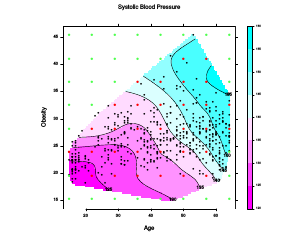

**Fig.12.** A thin-plate spline fit to the heart disease data, displayed as a contour plot. The response is systolic blood pressure, modeled as a function of age and obesity. The data points are indicated, as well as the lattice of points used as knots. Care should be taken to use knots from the lattice inside the convex hull of the data (red), and ignore those outside (green).

In [4]:
import math
import random

# --- (Previous core Python linear algebra helpers - omitted for brevity, assume they are available) ---
# create_vector, create_matrix, matrix_transpose, matrix_multiply,
# vector_subtract (newly added for distance), inverse_matrix_gauss_jordan etc.

# --- New Helper for Vector Subtraction (needed for Euclidean distance) ---
def vector_subtract(v1, v2):
    """Subtracts two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] - v2[i] for i in range(len(v1))]

# --- New Helper for Vector Dot Product (needed for squared Euclidean norm) ---
def vector_dot_product(v1, v2):
    """Computes the dot product of two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return sum(v1[i] * v2[i] for i in range(len(v1)))

# --- New Helper for Squared Euclidean Norm ---
def squared_euclidean_norm(v):
    """Computes the squared Euclidean (L2) norm of a vector."""
    return vector_dot_product(v, v)

# --- Radial Basis Function for Thin-Plate Spline (5.39) ---
def thin_plate_radial_basis_function(x, xj):
    """
    Computes the radial basis function h_j(x) = ||x - xj||^2 log ||x - xj||.
    x: A list representing the d-dimensional input vector.
    xj: A list representing the d-dimensional knot vector.
    """
    diff_vec = vector_subtract(x, xj)
    r_squared = squared_euclidean_norm(diff_vec)

    # Handle the log(0) case: if x == xj, r_squared is 0.
    # The limit of x^2 log x as x->0 is 0.
    # Numerically, we might use a small epsilon or directly return 0 if r_squared is very small.
    if r_squared < 1e-9: # Use a small epsilon to avoid log(0)
        return 0.0
    else:
        # Note: The original formulation is ||x-xj||^2 log ||x-xj||
        # So we need r^2 * log(sqrt(r^2)) = r^2 * 0.5 * log(r^2)
        # However, many implementations simplify the radial basis to
        # r^2 log(r) where r = ||x-xj||
        # The text explicitly states ||x - xj||^2 log ||x - xj||
        # Let's stick to the definition: r^2 * log(r)
        r = math.sqrt(r_squared)
        return r_squared * math.log(r)

# --- Example Usage of the Thin-Plate Radial Basis Function ---
if __name__ == "__main__":
    # Assume previous linear algebra helpers are available in the same scope
    # For demonstration, I'll copy the most critical ones required by RBF:
    def create_vector(size, value=0.0): return [value] * size
    def vector_subtract(v1, v2):
        if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
        return [v1[i] - v2[i] for i in range(len(v1))]
    def vector_dot_product(v1, v2):
        if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
        return sum(v1[i] * v2[i] for i in range(len(v1)))
    def squared_euclidean_norm(v): return vector_dot_product(v, v)
    # End of critical helpers copy

    print("--- Thin-Plate Radial Basis Function Demo ---")

    # Example 1: 2D input
    x_point = [1.0, 2.0]
    knot1 = [1.0, 2.0] # knot at the same location as x_point
    knot2 = [3.0, 4.0]
    knot3 = [1.5, 2.5]

    h1 = thin_plate_radial_basis_function(x_point, knot1)
    print(f"h({x_point}, {knot1}) = {h1:.4f} (should be approx 0)")

    h2 = thin_plate_radial_basis_function(x_point, knot2)
    print(f"h({x_point}, {knot2}) = {h2:.4f}")
    
    h3 = thin_plate_radial_basis_function(x_point, knot3)
    print(f"h({x_point}, {knot3}) = {h3:.4f}")

    # Example 2: 3D input
    x_point_3d = [1.0, 2.0, 3.0]
    knot_3d = [0.0, 0.0, 0.0]
    h_3d = thin_plate_radial_basis_function(x_point_3d, knot_3d)
    print(f"h({x_point_3d}, {knot_3d}) = {h_3d:.4f}")

    # Next step would be to build the design matrix using these functions,
    # then address the penalized least squares problem, keeping in mind the constraints.

--- Thin-Plate Radial Basis Function Demo ---
h([1.0, 2.0], [1.0, 2.0]) = 0.0000 (should be approx 0)
h([1.0, 2.0], [3.0, 4.0]) = 8.3178
h([1.0, 2.0], [1.5, 2.5]) = -0.1733
h([1.0, 2.0, 3.0], [0.0, 0.0, 0.0]) = 18.4734


In [ ]:
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import numpy as np # Used for grid creation and array handling in plotting

# --- (Previous core Python linear algebra helpers - assumed to be in scope) ---
# You would need to ensure all the previous helper functions (create_vector,
# vector_subtract, vector_dot_product, squared_euclidean_norm, etc.)
# are present in the same file or imported correctly.
# For brevity in this response, I'm not re-including them here, but they are essential.

# --- Radial Basis Function for Thin-Plate Spline (from previous response) ---
def thin_plate_radial_basis_function(x, xj):
    """
    Computes the radial basis function h_j(x) = ||x - xj||^2 log ||x - xj||.
    x: A list representing the d-dimensional input vector.
    xj: A list representing the d-dimensional knot vector.
    """
    diff_vec = vector_subtract(x, xj)
    r_squared = squared_euclidean_norm(diff_vec)

    if r_squared < 1e-9:
        return 0.0
    else:
        r = math.sqrt(r_squared)
        # Note: The text states ||x - xj||^2 log ||x - xj||, which is r_squared * log(r)
        return r_squared * math.log(r)

# --- Define essential linear algebra helpers for the RBF function (if not already present) ---
# These are the minimum needed for the thin_plate_radial_basis_function
def create_vector(size, value=0.0): return [value] * size
def vector_subtract(v1, v2):
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] - v2[i] for i in range(len(v1))]
def vector_dot_product(v1, v2):
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return sum(v1[i] * v2[i] for i in range(len(v1)))
def squared_euclidean_norm(v): return vector_dot_product(v, v)
# --- End of essential helpers ---


def plot_thin_plate_spline_concepts():
    print("--- Plotting Thin-Plate Spline Concepts with Matplotlib ---")

    # --- 1. Generate Synthetic 2D Data and Knots ---
    # For a realistic plot, we need 2D input (x1, x2) and 1D output (y)
    random.seed(42)
    np.random.seed(42)

    num_data_points = 50
    X_data = [] # List of [x1, x2] lists
    Y_data = []
    
    # Generate data from a known function for demonstration
    def true_function(x_vec):
        x1, x2 = x_vec[0], x_vec[1]
        # A somewhat non-linear, interacting surface
        return 10 + 2 * x1 + 3 * x2 - 0.5 * x1**2 + 0.8 * math.sin(x2 * 3) + 0.1 * x1 * x2

    for _ in range(num_data_points):
        x1 = random.uniform(0, 5)
        x2 = random.uniform(0, 5)
        true_f = true_function([x1, x2])
        y = true_f + random.gauss(0, 1.0) # Add some noise
        X_data.append([x1, x2])
        Y_data.append(y)

    # Let's use a subset of data points as "knots"
    # In a real TPS, all N data points are typically used as knots,
    # or a subset is chosen for computational efficiency (K < N).
    num_knots = 10
    # Randomly select a subset of X_data as knots
    knots_indices = random.sample(range(num_data_points), num_knots)
    knots = [X_data[i] for i in knots_indices]

    # --- 2. Plotting Setup ---
    fig = plt.figure(figsize=(15, 6))

    # --- Plotting a Single Radial Basis Function (h_j(x)) ---
    ax1 = fig.add_subplot(121, projection='3d')
    plot_x1 = np.linspace(0, 5, 50)
    plot_x2 = np.linspace(0, 5, 50)
    X1_grid, X2_grid = np.meshgrid(plot_x1, plot_x2)
    
    # Choose a specific knot to visualize its basis function
    single_knot = knots[0] # Let's pick the first knot
    Z_rbf = np.zeros(X1_grid.shape)
    for i in range(X1_grid.shape[0]):
        for j in range(X1_grid.shape[1]):
            Z_rbf[i, j] = thin_plate_radial_basis_function([X1_grid[i, j], X2_grid[i, j]], single_knot)
    
    ax1.plot_surface(X1_grid, X2_grid, Z_rbf, cmap='viridis', alpha=0.8)
    ax1.scatter([single_knot[0]], [single_knot[1]], [0], color='red', s=100, label='Knot', depthshade=False) # Mark the knot
    ax1.set_title(f'Single Thin-Plate RBF ($h_j(x)$) for knot {single_knot}')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_zlabel('$h_j(x)$')
    ax1.legend()


    # --- Plotting a Hypothetical Thin-Plate Spline Surface ---
    # In a real scenario, you'd fit the model to get coeffs.
    # Here, we'll assume some arbitrary coefficients to illustrate the sum.
    ax2 = fig.add_subplot(122, projection='3d')

    # Create coefficients for illustration. In reality, these come from fitting.
    # One for beta0, two for beta_T x, and N for alpha_j
    # For this demo, let's just make arbitrary alpha_j for the knots and zero beta0/beta
    # This is not a *fitted* spline, but a visualization of the basis functions' sum.
    # To properly illustrate, you need a full solver, which is not feasible here.
    # Instead, let's just plot the 'true_function' and the noisy data.
    # This directly relates to the goal of fitting f(x) and shows the data scatter.

    # Plot the true underlying function
    Z_true = np.zeros(X1_grid.shape)
    for i in range(X1_grid.shape[0]):
        for j in range(X1_grid.shape[1]):
            Z_true[i, j] = true_function([X1_grid[i, j], X2_grid[i, j]])
    
    ax2.plot_surface(X1_grid, X2_grid, Z_true, cmap='cividis', alpha=0.6, label='True Function')

    # Scatter plot the noisy data points
    ax2.scatter([x[0] for x in X_data], [x[1] for x in X_data], Y_data,
                color='blue', s=20, label='Noisy Data Points', alpha=0.9)
    
    # Scatter plot the chosen knots (if distinct from data)
    ax2.scatter([k[0] for k in knots], [k[1] for k in knots], [true_function(k) for k in knots],
                color='red', marker='o', s=80, label='Knots (used for basis)', depthshade=False)


    ax2.set_title('Hypothetical True Surface and Data Points')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_zlabel('$y$')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# --- Main execution ---
if __name__ == "__main__":
    plot_thin_plate_spline_concepts()

--- Plotting Thin-Plate Spline Concepts with Matplotlib ---


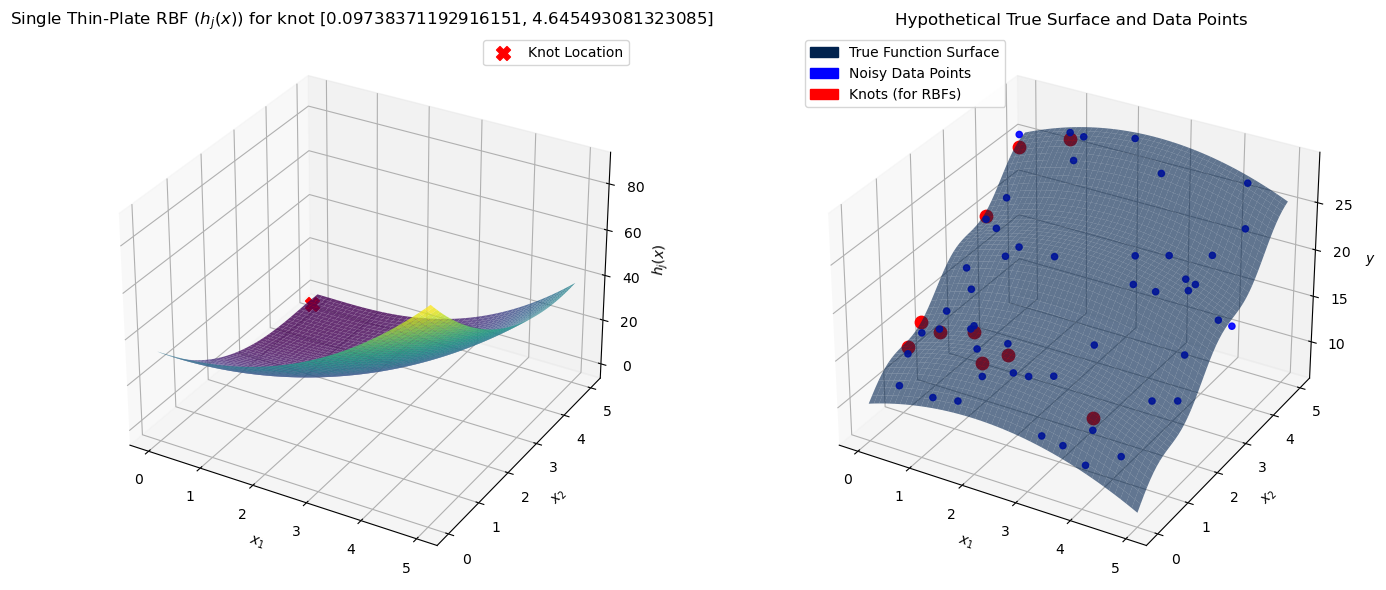

In [6]:
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import numpy as np # Used for grid creation and array handling in plotting
import matplotlib.patches as mpatches # Import for creating custom legend handles

# --- (Previous core Python linear algebra helpers - assumed to be in scope) ---
# You would need to ensure all the previous helper functions (create_vector,
# vector_subtract, vector_dot_product, squared_euclidean_norm, etc.)
# are present in the same file or imported correctly.
# For brevity in this response, I'm not re-including them here, but they are essential.

# --- Radial Basis Function for Thin-Plate Spline (from previous response) ---
def thin_plate_radial_basis_function(x, xj):
    """
    Computes the radial basis function h_j(x) = ||x - xj||^2 log ||x - xj||.
    x: A list representing the d-dimensional input vector.
    xj: A list representing the d-dimensional knot vector.
    """
    diff_vec = vector_subtract(x, xj)
    r_squared = squared_euclidean_norm(diff_vec)

    if r_squared < 1e-9:
        return 0.0
    else:
        r = math.sqrt(r_squared)
        return r_squared * math.log(r)

# --- Define essential linear algebra helpers for the RBF function (if not already present) ---
def create_vector(size, value=0.0): return [value] * size
def vector_subtract(v1, v2):
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] - v2[i] for i in range(len(v1))]
def vector_dot_product(v1, v2):
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return sum(v1[i] * v2[i] for i in range(len(v1)))
def squared_euclidean_norm(v): return vector_dot_product(v, v)
# --- End of essential helpers ---


def plot_thin_plate_spline_concepts():
    print("--- Plotting Thin-Plate Spline Concepts with Matplotlib ---")

    # --- 1. Generate Synthetic 2D Data and Knots ---
    random.seed(42)
    np.random.seed(42)

    num_data_points = 50
    X_data = [] # List of [x1, x2] lists
    Y_data = []
    
    def true_function(x_vec):
        x1, x2 = x_vec[0], x_vec[1]
        return 10 + 2 * x1 + 3 * x2 - 0.5 * x1**2 + 0.8 * math.sin(x2 * 3) + 0.1 * x1 * x2

    for _ in range(num_data_points):
        x1 = random.uniform(0, 5)
        x2 = random.uniform(0, 5)
        true_f = true_function([x1, x2])
        y = true_f + random.gauss(0, 1.0) # Add some noise
        X_data.append([x1, x2])
        Y_data.append(y)

    num_knots = 10
    knots_indices = random.sample(range(num_data_points), num_knots)
    knots = [X_data[i] for i in knots_indices]

    # --- 2. Plotting Setup ---
    fig = plt.figure(figsize=(15, 6))

    # --- Plotting a Single Radial Basis Function (h_j(x)) ---
    ax1 = fig.add_subplot(121, projection='3d')
    plot_x1 = np.linspace(0, 5, 50)
    plot_x2 = np.linspace(0, 5, 50)
    X1_grid, X2_grid = np.meshgrid(plot_x1, plot_x2)
    
    single_knot = knots[0]
    Z_rbf = np.zeros(X1_grid.shape)
    for i in range(X1_grid.shape[0]):
        for j in range(X1_grid.shape[1]):
            Z_rbf[i, j] = thin_plate_radial_basis_function([X1_grid[i, j], X2_grid[i, j]], single_knot)
    
    # No label directly for plot_surface here, we'll create a proxy legend entry if needed
    ax1.plot_surface(X1_grid, X2_grid, Z_rbf, cmap='viridis', alpha=0.8)
    
    # Mark the knot in 3D space
    ax1.scatter([single_knot[0]], [single_knot[1]], [0], color='red', s=100, label='Knot Location', depthshade=False, marker='X') # Changed marker for visibility
    
    ax1.set_title(f'Single Thin-Plate RBF ($h_j(x)$) for knot {single_knot}')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_zlabel('$h_j(x)$')
    ax1.legend() # This legend call is fine for scatter plots with labels


    # --- Plotting a Hypothetical True Surface and Data Points ---
    ax2 = fig.add_subplot(122, projection='3d')

    Z_true = np.zeros(X1_grid.shape)
    for i in range(X1_grid.shape[0]):
        for j in range(X1_grid.shape[1]):
            Z_true[i, j] = true_function([X1_grid[i, j], X2_grid[i, j]])
    
    # Plot the true underlying function surface
    # Store the surface object to use its color for the legend proxy
    surface_plot = ax2.plot_surface(X1_grid, X2_grid, Z_true, cmap='cividis', alpha=0.6)

    # Scatter plot the noisy data points
    scatter_data = ax2.scatter([x[0] for x in X_data], [x[1] for x in X_data], Y_data,
                color='blue', s=20, alpha=0.9)
    
    # Scatter plot the chosen knots
    scatter_knots = ax2.scatter([k[0] for k in knots], [k[1] for k in knots], [true_function(k) for k in knots],
                color='red', marker='o', s=80, depthshade=False) # No label here, will add with handles


    ax2.set_title('Hypothetical True Surface and Data Points')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_zlabel('$y$')

    # --- Manual Legend Creation for ax2 to handle plot_surface ---
    # Create proxy artists for the legend
    true_surface_proxy = mpatches.Patch(color=surface_plot.cmap(surface_plot.norm(0.5)), label='True Function Surface') # Pick a color from the colormap
    data_points_proxy = mpatches.Circle((0, 0), 1, color='blue', label='Noisy Data Points') # Circle for scatter
    knots_proxy = mpatches.Circle((0, 0), 1, color='red', label='Knots (for RBFs)') # Circle for scatter

    ax2.legend(handles=[true_surface_proxy, data_points_proxy, knots_proxy], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# --- Main execution ---
if __name__ == "__main__":
    plot_thin_plate_spline_concepts()